## Python Frontend
This notebook demonstrates the Python frontend to MPB.

In [27]:
%load_ext autoreload
%autoreload 2
from mpb import MPB, MultipleMPB
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
# make sure to not use Level-3 fonts
mpl.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
mpb = MPB()

Any configuration values (or subtrees) can be set and retrieved using the bracket operator on the `MPB` instance. The key is a string and by using the dot-notation, a path can be given:

In [29]:
mpb["ompl.seed"] = 4  # set the seed of the OMPL planners

Some helper functions are available to set environment properties, and configure the planners, steer functions and post smoothers:

In [30]:
folder_prefix = "/home/ksatyaki/workspace/bench_ws/src/bench-mr/"
mpb.set_image_yaml_env(folder_prefix + "maps/pedsim_warehouse.yaml")
mpb.set_planners(['rrt_star', 'prm_star'])
# start: {x: 2., y: 1.9, theta: 1.226}
mpb.set_start(32.233, 7.3, -3.14)
# goal: {x: 22.968, y: 19.0, theta: 0.785}
mpb.set_goal(3.568, 7.3, -3.14)
mpb.set_steer_functions(['car'])

mpb["env.collision.robot_shape_source"] = folder_prefix + "maps/simple_robot.yaml"
mpb["steer.car_turning_radius"] = 0.5
mpb["steer.sampling_resolution"] = 0.01

mpb["ompl.optimization_objective"] = "dtc"
mpb["mod.mod_file_name"] = folder_prefix + "maps/pedsim_warehouse_cliff.xml"
mpb["max_planning_time"] = 5


Run the motion planning benchmark:

In [31]:
mpb.run(id='mod_testing', runs=10);  # optional run ID, number of runs (environments)

Running MPB with ID mod_testing (log file at mod_testing.log)...


mod_testing:   0%|          | 0/20 [00:00<?, ?it/s]

In [32]:
mpb.print_info()

+++++++++++++++++++++++++ Run #0 (1 / 10) +++++++++++++++++++++++++
+ Steering:        Car 
+ Environment:     MRPT Grid-map
+ Planners:        RRTstar, PRMstar
+ Found solution:  2 / 2
+ Exact solution:  2 / 2
+ Found colliding: 0 / 2
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++ Run #1 (2 / 10) +++++++++++++++++++++++++
+ Steering:        Car 
+ Environment:     MRPT Grid-map
+ Planners:        RRTstar, PRMstar
+ Found solution:  2 / 2
+ Exact solution:  2 / 2
+ Found colliding: 0 / 2
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++ Run #2 (3 / 10) +++++++++++++++++++++++++
+ Steering:        Car 
+ Environment:     MRPT Grid-map
+ Planners:        RRTstar, PRMstar
+ Found solution:  2 / 2
+ Exact solution:  2 / 2
+ Found colliding: 0 / 2
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++ Run #3 (4 / 10) +++++++++++++++++++++++++
+ Steering:      

Visualize the planner trajectories:

Visualizing mod_testing_results.json


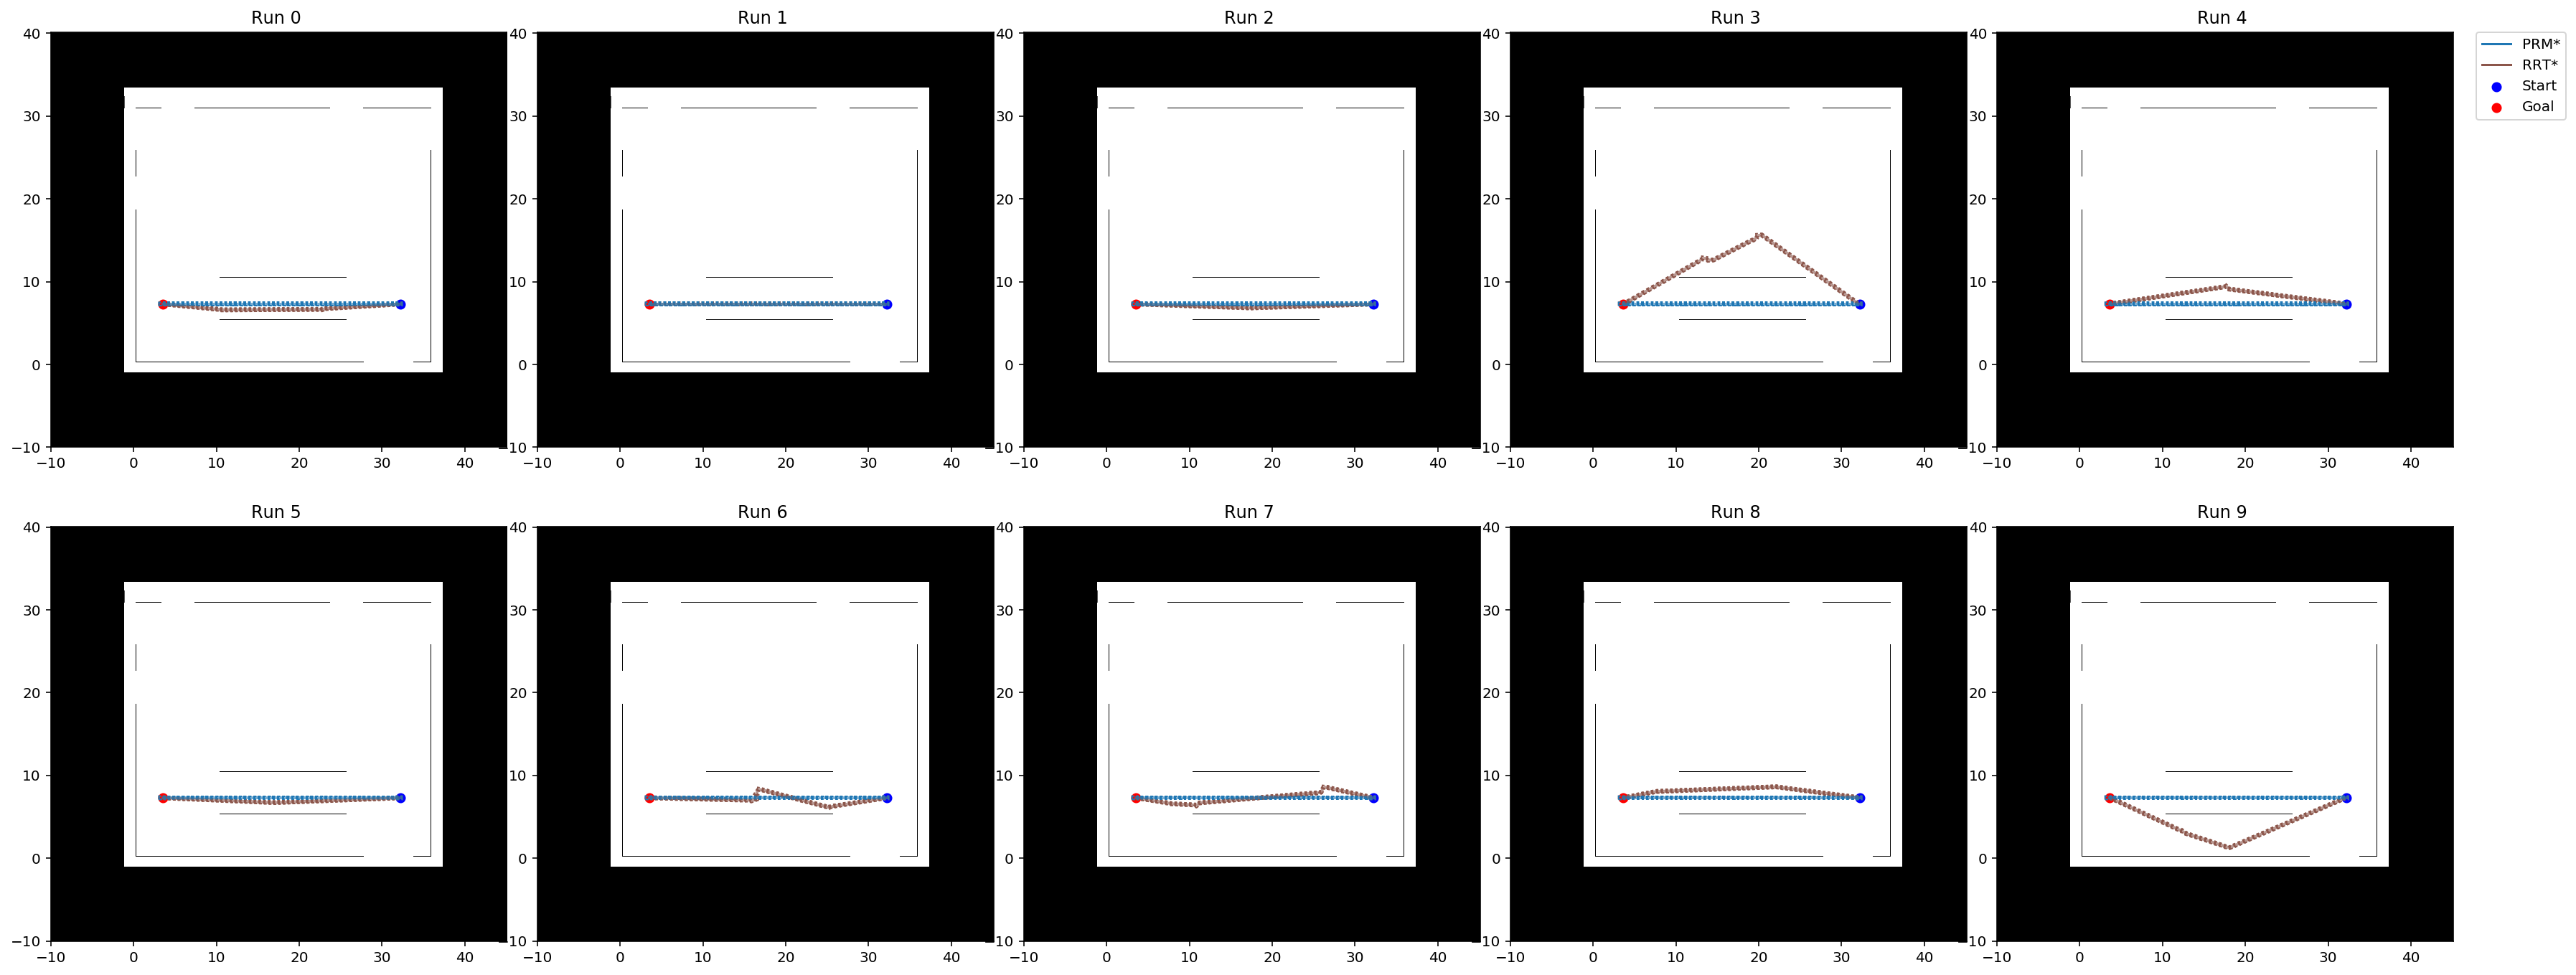

<Figure size 432x288 with 0 Axes>

In [33]:
mpb.visualize_trajectories()
plt.savefig("MoD-planning.pdf", bbox_inches='tight')

Plot planner statistics:

Visualizing mod_testing_results.json...


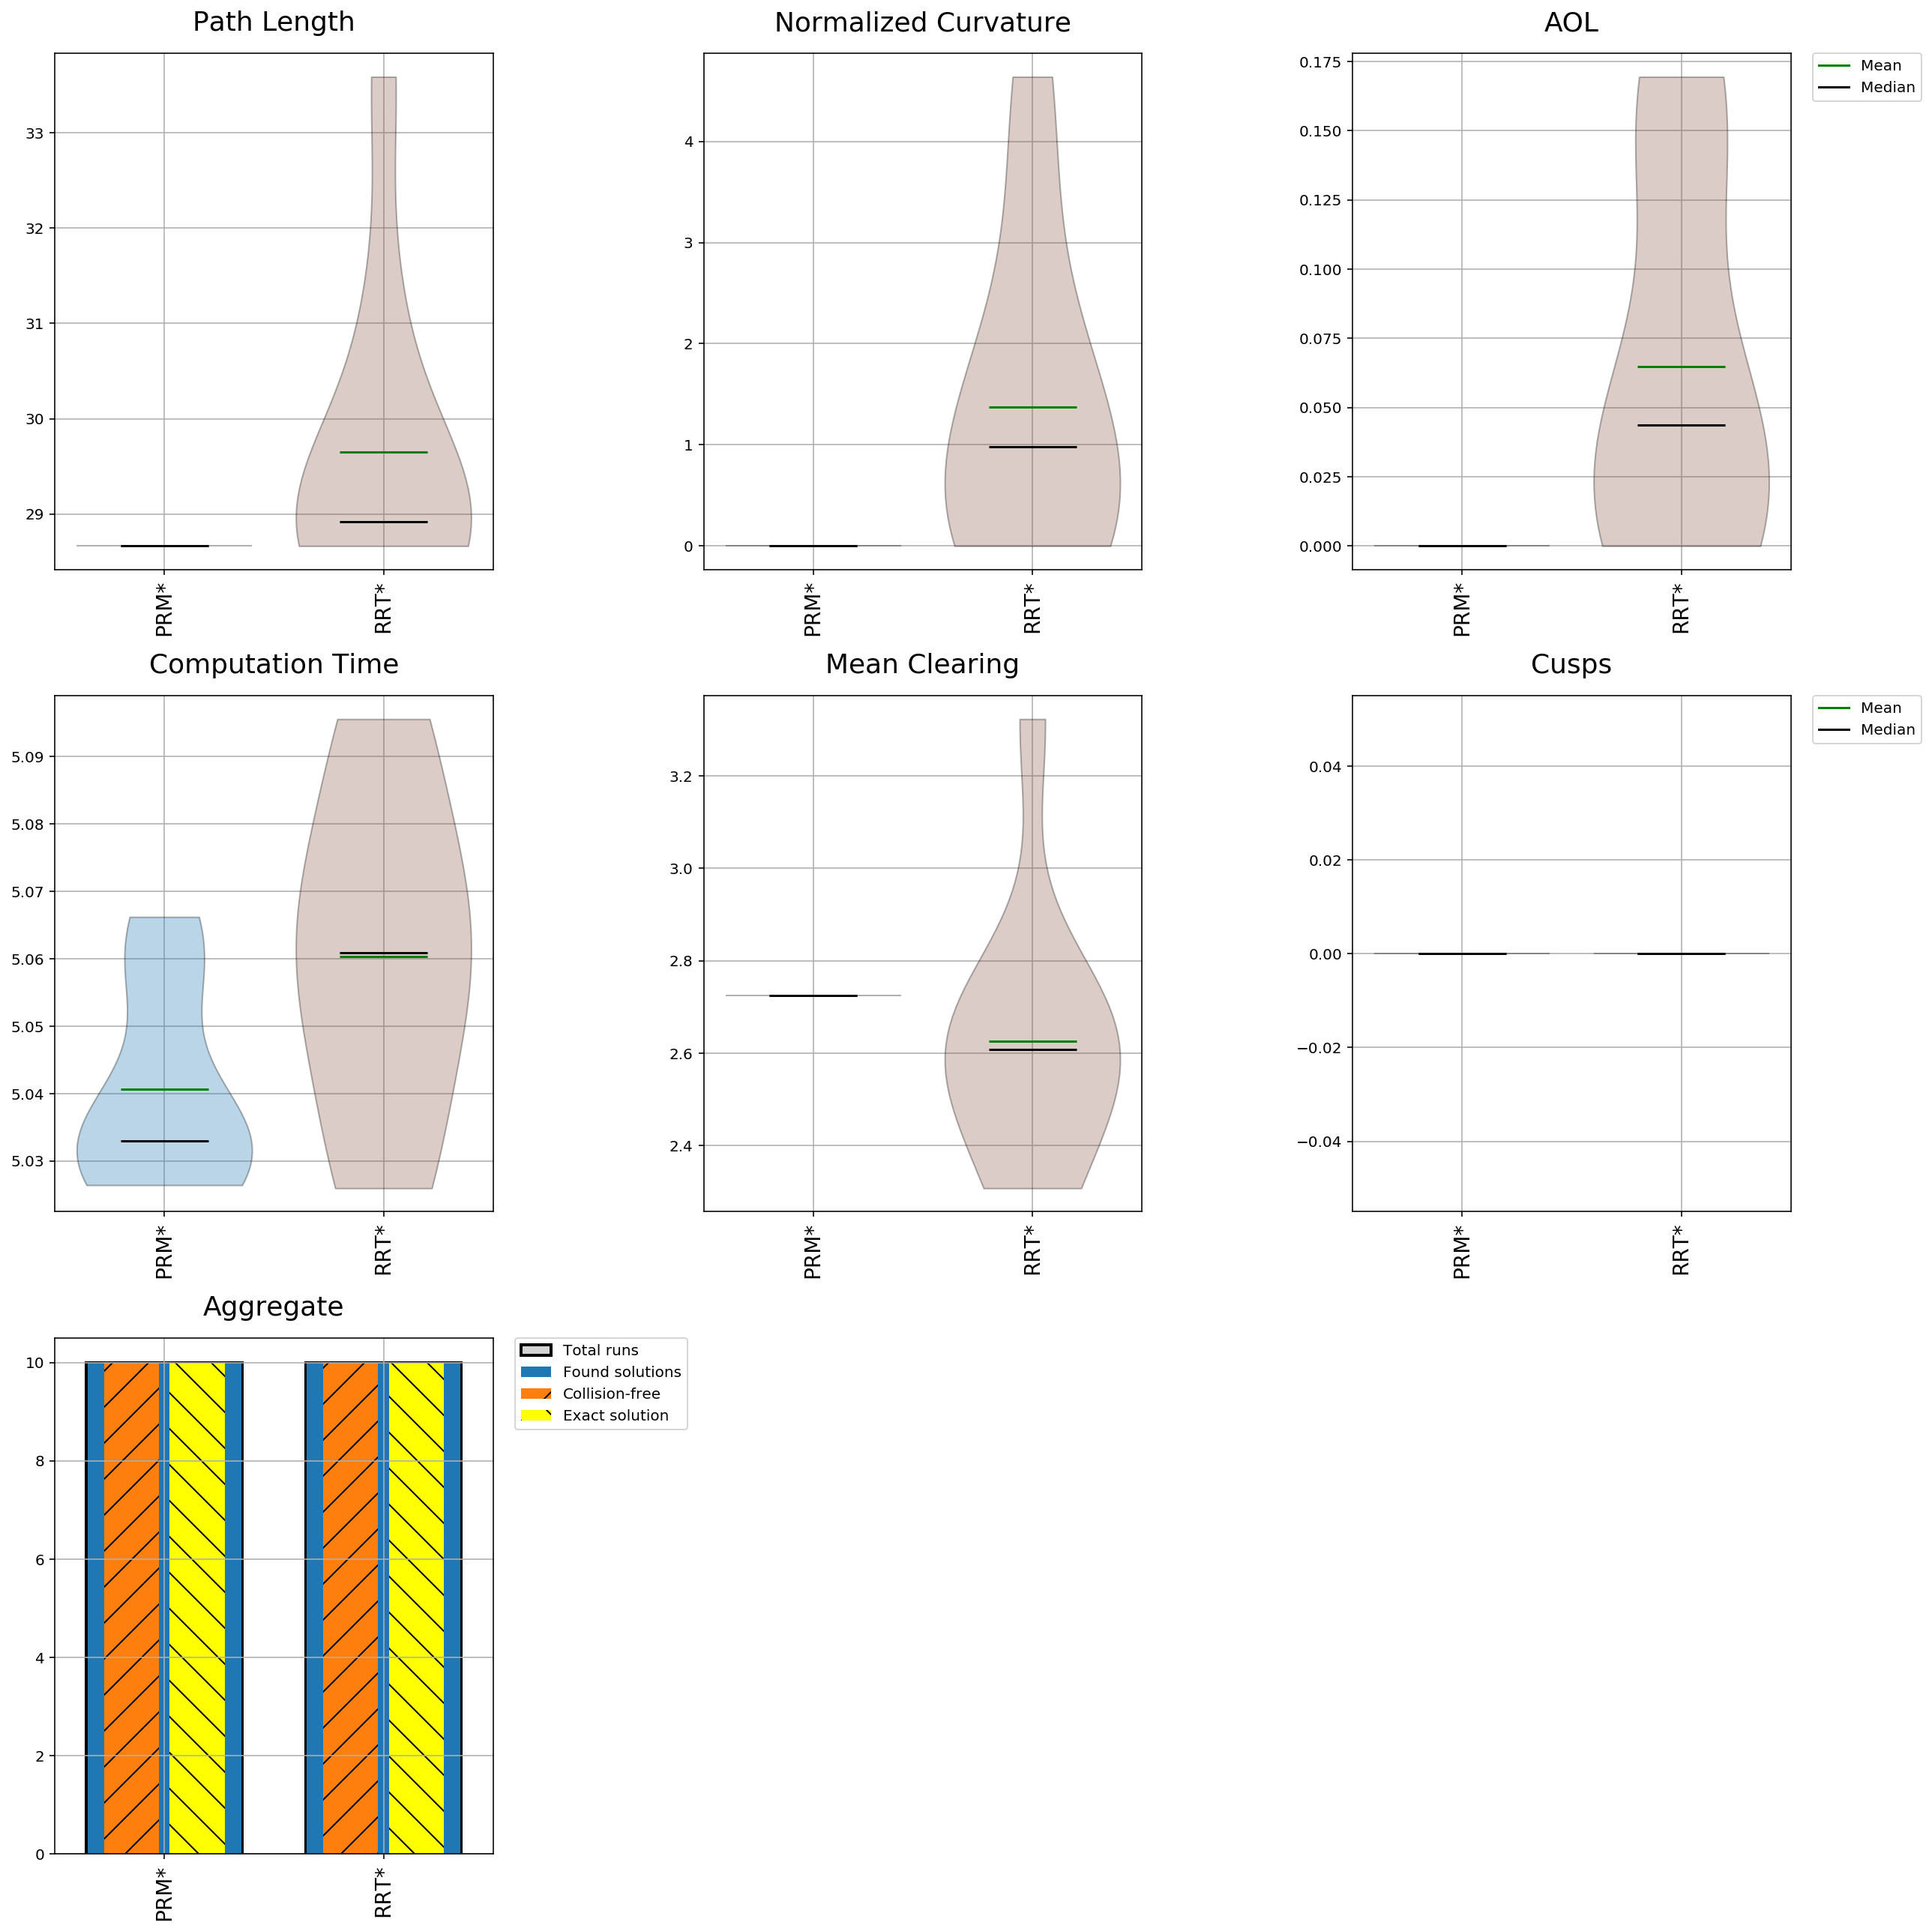

In [34]:
mpb.plot_planner_stats()